<a href="https://colab.research.google.com/github/hamednasr/tensorflow/blob/main/02_ANN_tensorflow_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import scipy.stats as stats
from sklearn.preprocessing import Normalizer

In [2]:
n_samples = 500
X, y = make_circles(n_samples, noise=.07,factor = .7)

In [3]:
X.shape

(500, 2)

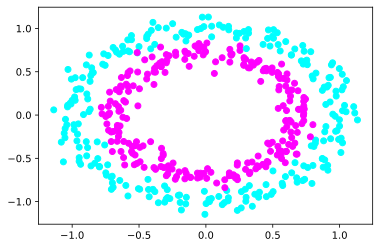

In [4]:
plt.scatter(X[:,0],X[:,1],c=y, cmap = 'cool')

In [6]:
y[:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [22]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(64,activation='relu'),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history = model.fit(X_train,y_train,epochs=20)

Epoch 1/20
15/15 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.4978
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.4978
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.4978
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.5156
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6204 - accuracy: 0.5822
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.7244
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.8578
Epoch 8/20
15/15 [==============================] - 0s 4ms/step - loss: 0.3707 - accuracy: 0.9356
Epoch 9/20
15/15 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9689
Epoch 10/20
15/15 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9644
Epoch 11/20
15/15 [

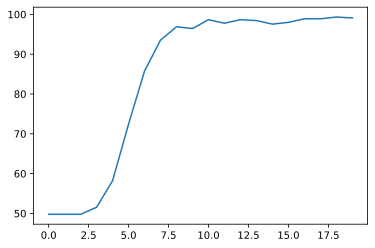

In [23]:
plt.plot(np.array(history.history['accuracy'])*100)

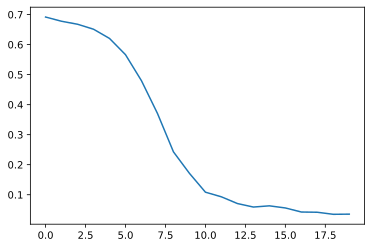

In [24]:
plt.plot(history.history['loss'])